In [11]:
import xarray as xr
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs

In [12]:
#Data created using era5_spatial_cluster.py

f = xr.open_mfdataset("/g/data/eg3/ab4502/ExtremeWind/aus/era5/clusters*", concat_dim="time", combine="nested").isel({"time":slice(0,324)})

Text(0.5, 1.0, 'Fraction of times that belong to cluster 3\n and have BDSD > 0.83')

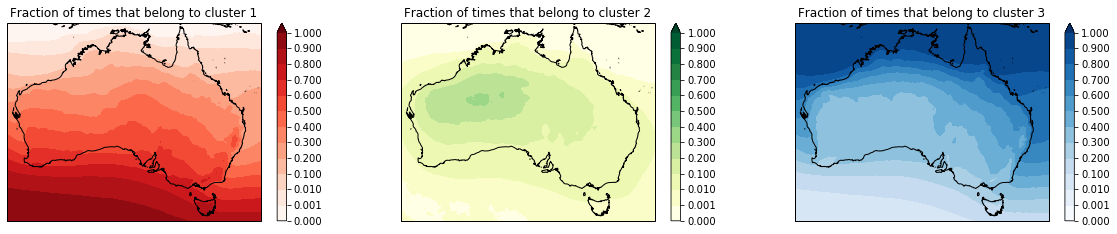

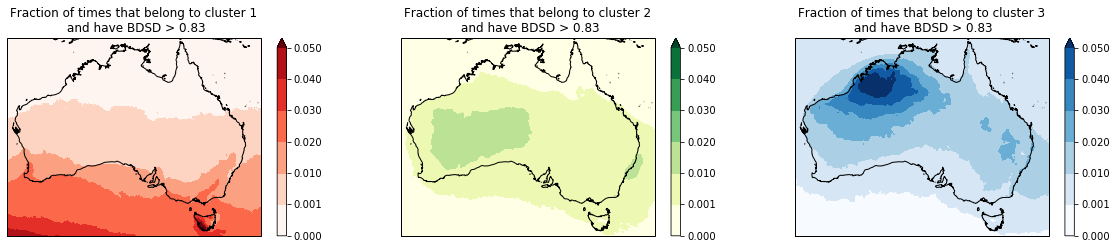

In [14]:
levs=[0,0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

plt.figure(figsize=[20,8])
ax=plt.subplot(2,3,1,projection=ccrs.PlateCarree())
c=xr.plot.contourf(f.cluster1.mean("time"), cmap=plt.get_cmap("Reds"),levels=levs, ax=ax, extend="max",add_colorbar=False)
ax.coastlines("10m")
cb=plt.colorbar(c)
cb.set_ticks(levs)
plt.title("Fraction of times that belong to cluster 1")

ax=plt.subplot(2,3,2,projection=ccrs.PlateCarree())
c=xr.plot.contourf(f.cluster2.mean("time"), cmap=plt.get_cmap("YlGn"),levels=levs, ax=ax, extend="max",add_colorbar=False)
ax.coastlines("10m")
cb=plt.colorbar(c)
cb.set_ticks(levs)
plt.title("Fraction of times that belong to cluster 2")

ax=plt.subplot(2,3,3,projection=ccrs.PlateCarree())
c=xr.plot.contourf(f.cluster3.mean("time"), cmap=plt.get_cmap("Blues"),levels=levs, ax=ax, extend="max",add_colorbar=False)
ax.coastlines("10m")
cb=plt.colorbar(c)
cb.set_ticks(levs)
plt.title("Fraction of times that belong to cluster 3")




levs=[0,0.001,0.01,0.02,0.03,0.04,0.05]

plt.figure(figsize=[20,8])
ax=plt.subplot(2,3,1,projection=ccrs.PlateCarree())
c=xr.plot.contourf(f.cluster1_bdsd.mean("time"), cmap=plt.get_cmap("Reds"),levels=levs, ax=ax, extend="max",add_colorbar=False)
ax.coastlines("10m")
cb=plt.colorbar(c)
cb.set_ticks(levs)
plt.title("Fraction of times that belong to cluster 1\n and have BDSD > 0.83")

ax=plt.subplot(2,3,2,projection=ccrs.PlateCarree())
c=xr.plot.contourf(f.cluster2_bdsd.mean("time"), cmap=plt.get_cmap("YlGn"),levels=levs, ax=ax, extend="max",add_colorbar=False)
ax.coastlines("10m")
cb=plt.colorbar(c)
cb.set_ticks(levs)
plt.title("Fraction of times that belong to cluster 2\n and have BDSD > 0.83")

ax=plt.subplot(2,3,3,projection=ccrs.PlateCarree())
c=xr.plot.contourf(f.cluster3_bdsd.mean("time"), cmap=plt.get_cmap("Blues"),levels=levs, ax=ax, extend="max",add_colorbar=False)
ax.coastlines("10m")
cb=plt.colorbar(c)
cb.set_ticks(levs)
plt.title("Fraction of times that belong to cluster 3\n and have BDSD > 0.83")

In [10]:
# def get_era5_cluster(y,m):

#     assert len(m) == 2
#     assert len(y) == 4
    
#     f=xr.open_mfdataset("/g/data/eg3/ab4502/ExtremeWind/aus/era5/era5_"+y+m+"*.nc",combine='by_coords')
    
#     cluster_mod = joblib.load('/g/data/eg3/ab4502/figs/ExtremeWind/case_studies/cluster_model_era5.pkl')
#     cluster_input = pd.read_csv("/g/data/eg3/ab4502/figs/ExtremeWind/case_studies/cluster_input_era5.csv").drop(columns=["Unnamed: 0"])
#     s06 = (f["s06"] - cluster_input["s06"].min()) / (cluster_input["s06"].max()-cluster_input["s06"].min())
#     qmean01 = (f["qmean01"] - cluster_input["qmean01"].min()) / (cluster_input["qmean01"].max()-cluster_input["qmean01"].min())
#     lr13 = (f["lr13"] - cluster_input["lr13"].min()) / (cluster_input["lr13"].max()-cluster_input["lr13"].min())
#     Umean06 = (f["Umean06"] - cluster_input["Umean06"].min()) / (cluster_input["Umean06"].max()-cluster_input["Umean06"].min())

#     dim=("time","lat","lon")

#     s06_1d = s06.stack(dim=dim)
#     qmean01_1d = qmean01.stack(dim=dim)
#     lr13_1d = lr13.stack(dim=dim)
#     Umean06_1d = Umean06.stack(dim=dim)
#     X = pd.DataFrame({"s06":s06_1d, "qmean01":qmean01_1d, "lr13":lr13_1d, "Umean06":Umean06_1d})
#     preds = cluster_mod.predict(X).reshape(s06.shape)
#     preds_new = np.copy(preds)
#     preds_new[preds==1]=2
#     preds_new[preds==2]=1
    
#     x, y = np.meshgrid(f.lon.values, f.lat.values)

#     return preds_new, f.bdsd.values, x, y

# def plot_clusters_all(preds_new, x, y):
    
    
#     plt.figure(figsize=[20,4])
#     ax=plt.subplot(1,3,1,projection=ccrs.PlateCarree())
#     c=ax.contourf(x,y,(preds_new==0).sum(axis=0) / preds_new.shape[0],cmap=plt.get_cmap("Reds"),levels=np.linspace(0,1,10))
#     plt.colorbar(c)
#     ax.coastlines("10m")

#     ax=plt.subplot(1,3,2,projection=ccrs.PlateCarree())
#     c=ax.contourf(x,y,(preds_new==1).sum(axis=0) / preds_new.shape[0],cmap=plt.get_cmap("YlGn"),levels=np.linspace(0,1,10))
#     plt.colorbar(c)
#     ax.coastlines("10m")

#     ax=plt.subplot(1,3,3,projection=ccrs.PlateCarree())
#     c=ax.contourf(x,y,(preds_new==2).sum(axis=0) / preds_new.shape[0],cmap=plt.get_cmap("Blues"),levels=np.linspace(0,1,10))
#     plt.colorbar(c)
#     ax.coastlines("10m")
    
# def plot_clusters_bdsd(preds_new, x, y, bdsd, bdsd_thresh, levels):
    
#     plt.figure(figsize=[20,4])
#     ax=plt.subplot(1,3,1,projection=ccrs.PlateCarree())
#     c=ax.contourf(x,y,
#                   ((preds_new==0) & (bdsd>bdsd_thresh[0])).sum(axis=0) / preds_new.shape[0],
#                   cmap=plt.get_cmap("Reds"), levels=levels, extend="max")
#     plt.colorbar(c)
#     ax.coastlines("10m")

#     ax=plt.subplot(1,3,2,projection=ccrs.PlateCarree())
#     c=ax.contourf(x,y,
#                   ((preds_new==1) & (bdsd>bdsd_thresh[1])).sum(axis=0) / preds_new.shape[0],
#                   cmap=plt.get_cmap("YlGn"), levels=levels, extend="max")
#     plt.colorbar(c)
#     ax.coastlines("10m")

#     ax=plt.subplot(1,3,3,projection=ccrs.PlateCarree())
#     c=ax.contourf(x,y,
#                   ((preds_new==2) & (bdsd>bdsd_thresh[2])).sum(axis=0) / preds_new.shape[0],
#                   cmap=plt.get_cmap("Blues"), levels=levels, extend="max")
#     plt.colorbar(c)
#     ax.coastlines("10m")    

# preds_202001, bdsd_202001, x, y = get_era5_cluster("2020","01")
# preds_202006, bdsd_202006, x, y = get_era5_cluster("2020","06")
# preds_202011, bdsd_202011, x, y = get_era5_cluster("2020","11")

# plot_clusters_all(preds_202001, x, y); plt.suptitle("Fraction of times that are in each cluster")
# plot_clusters_all(preds_202006, x, y)
# plot_clusters_all(preds_202011, x, y)

# levels=np.arange(0,0.11,0.01)
# plot_clusters_bdsd(preds_202001, x, y,bdsd_202001,[0.83,0.83,0.83],levels); plt.suptitle("Fraction of times that are in each cluster and reach the BDSD threshold of 0.83")
# plot_clusters_bdsd(preds_202006, x, y,bdsd_202006,[0.83,0.83,0.83],levels)
# plot_clusters_bdsd(preds_202011, x, y,bdsd_202011,[0.83,0.83,0.83],levels)

# levels=np.arange(0,0.06,0.01)
# plot_clusters_bdsd(preds_202001, x, y, bdsd_202001,[0.9,0.97,0.86],levels); plt.suptitle("Fraction of times that are in each cluster and reach the optimal BDSD threshold for that cluster")
# plot_clusters_bdsd(preds_202006, x, y, bdsd_202006,[0.9,0.97,0.86],levels)
# plot_clusters_bdsd(preds_202011, x, y, bdsd_202011,[0.9,0.97,0.86],levels)